# Dynamic Programming

## 0/1 Knapsack

#### 0/1 Knapsack

The time complexity of the above algorithm is exponential O(2^n)
which is asymptotically equivalent to O(2^n)).

The space complexity is O(n)

In [1]:
def solve_knapsack(profits, weights, capacity):
    return knapsack_recursive(profits, weights, capacity, 0)


def knapsack_recursive(profits, weights, capacity, currentIndex):
    # base checks
    if capacity <= 0 or currentIndex >= len(profits):
        return 0

    # recursive call after choosing the element at the currentIndex
    # if the weight of the element at currentIndex exceeds the capacity, we  shouldn't process this
    profit1 = 0
    if weights[currentIndex] <= capacity:
        profit1 = profits[currentIndex] + knapsack_recursive(
            profits, weights, capacity - weights[currentIndex],
            currentIndex + 1)

    # recursive call after excluding the element at the currentIndex
    profit2 = knapsack_recursive(profits, weights, capacity, currentIndex + 1)

    return max(profit1, profit2)


def main():
    print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 7))
    print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 6))


main()

22
17


Bottom up DP

In [ ]:
def solve_knapsack(profits, weights, capacity):
    # basic checks
    n = len(profits)
    if capacity <= 0 or n == 0 or len(weights) != n:
        return 0

    dp = [[0 for x in range(capacity + 1)] for y in range(n)]

    # populate the capacity = 0 columns, with '0' capacity we have '0' profit
    for i in range(0, n):
        dp[i][0] = 0

    # if we have only one weight, we will take it if it is not more than the capacity
    for c in range(0, capacity + 1):
        if weights[0] <= c:
            dp[0][c] = profits[0]

    # process all sub-arrays for all the capacities
    for i in range(1, n):
        for c in range(1, capacity + 1):
            profit1, profit2 = 0, 0
            # include the item, if it is not more than the capacity
            if weights[i] <= c:
                profit1 = profits[i] + dp[i - 1][c - weights[i]]
            # exclude the item
            profit2 = dp[i - 1][c]
            # take maximum
            dp[i][c] = max(profit1, profit2)

    # maximum profit will be at the bottom-right corner.
    return dp[n - 1][capacity]


def main():
    print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 5))
    print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 6))
    print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 7))


main()

#### Equal Subset Sum Partition

#### Subset Sum

In [ ]:
#### Minimum Subset Sum Differenc
#### Count of Subset Sum
#### Target Sum
#### Unbounded Knapsack
#### Rod Cutting

#### Minimum Coin Change
#### Maximum Ribbon Cut
#### Fibonacci numbers
#### Staircase
#### Number factors
#### Minimum jumps to reach the end
#### Minimum jumps with fee
#### House thief
#### Longest Palindromic Subsequence
#### Longest Palindromic Substring
#### Count of Palindromic Substrings
#### Minimum Deletions in a String to make it a Palindrome
#### Palindromic Partitioning
#### Longest Common Substring
#### Longest Common Subsequence
#### Minimum Deletions & Insertions to Transform a String into another
#### Maximum Sum Increasing Subsequence
#### Longest Increasing Subsequence
#### Shortest Common Super-sequence
#### Minimum Deletions to Make a Sequence Sorted
#### Longest Repeating Subsequence
#### Subsequence Pattern Matching
#### Longest Bitonic Subsequence
#### Longest Alternating Subsequence
#### Edit Distance
#### Strings Interleaving
#### https://leetcode.com/problems/decode-ways
#### https://leetcode.com/problems/unique-paths
#### https://leetcode.com/problems/unique-binary-search-trees
#### https://leetcode.com/problems/best-time-to-buy-and-sell-stock-
#### https://leetcode.com/problems/best-time-to-buy-and-sell-stock-ii
#### https://leetcode.com/problems/best-time-to-buy-and-sell-stock-iii
#### https://leetcode.com/problems/best-time-to-buy-and-sell-stock-iv
#### https://leetcode.com/problems/best-time-to-buy-and-sell-stock-i

## Unbounded Knapsack

### [Climbing stairs](https://leetcode.com/problems/climbing-stairs/)

In [ ]:
class Solution:
    def climbStairs(self, n: int) -> int:
        dp = [0]*(n+1)
        dp[0] = 1
        dp[1] = 1
        
        for i in range(2,n+1):
            dp[i] = dp[i-1] + dp[i-2]
        return dp[n]

#### Coin Change

In [ ]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        print(dp)
        for coin in coins:
            for x in range(coin, amount + 1):
                dp[x] = min(dp[x], dp[x - coin] + 1)
        return dp[amount] if dp[amount] != float('inf') else -1 

### [Minimum path sum](https://leetcode.com/problems/minimum-path-sum/)

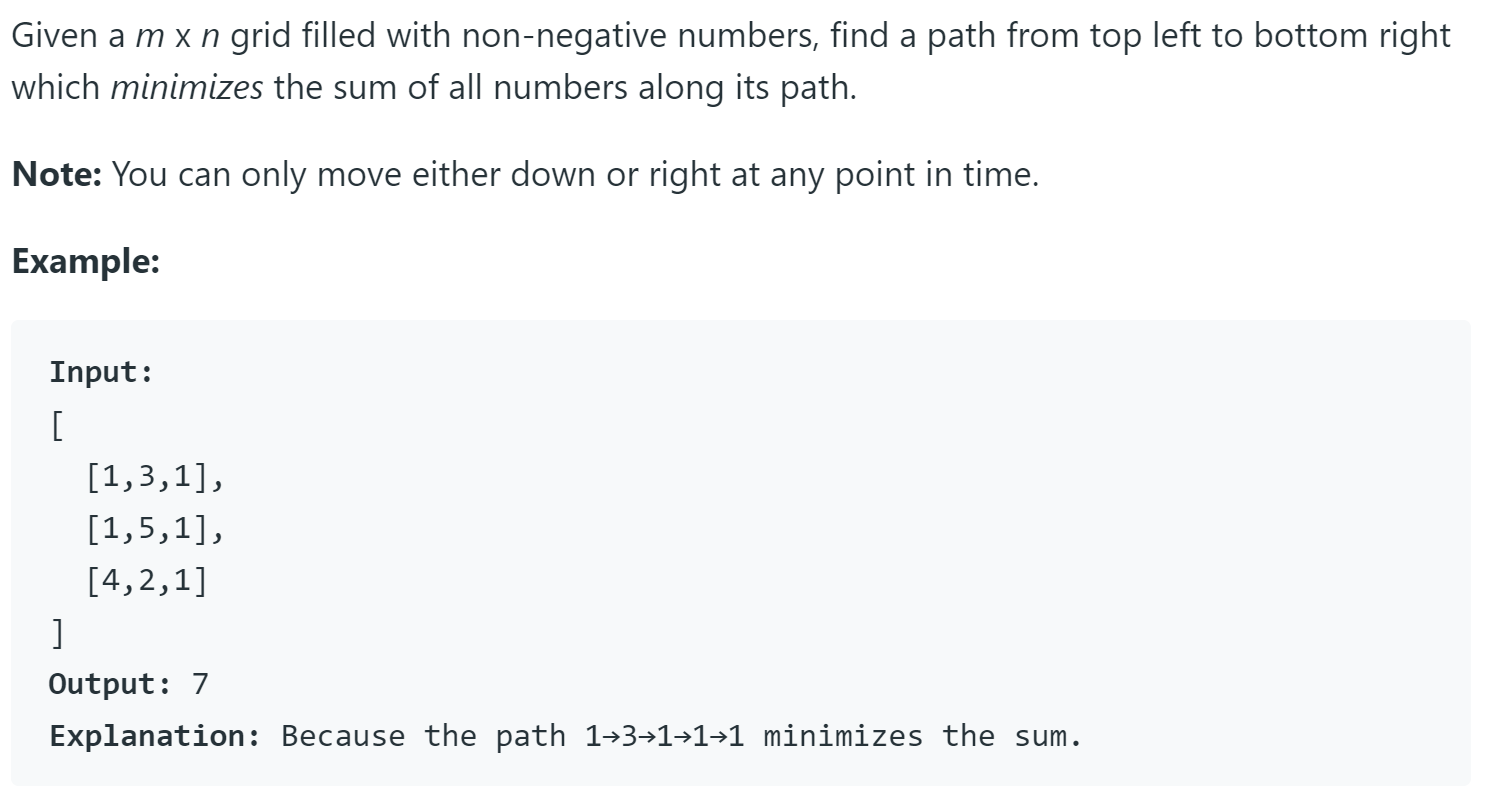

In [ ]:
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        row = len(grid)
        col = len(grid[0])
        
        for i in range(row):
            for j in range(col):
                # first row numbers can be reached by moving right only.
                if i == 0 and j > 0:
                    grid[i][j] += grid[i][j-1]
                # first col numbers can be reached by moving down only.
                if j == 0 and i > 0:
                    grid[i][j] += grid[i-1][j]
                # check the min of way to reach this position either by moving right or down 
                elif i >0 and j > 0:
                    grid[i][j] += min(grid[i-1][j], grid[i][j-1])
        print(grid)
        return grid[-1][-1]
                    
        

### [Minimum Falling Path Sum](https://leetcode.com/problems/minimum-falling-path-sum/)

In [ ]:
class Solution:
    def minFallingPathSum(self, A: List[List[int]]) -> int:
        row = len(A)
        col = len(A[0])
    
        for i in range(1, row):
            for j in range(col):
                if j > 0 and j < col-1:
                    A[i][j] += min(A[i-1][j], A[i-1][j-1], A[i-1][j+1]) 
                elif j == 0:
                    A[i][j] += min(A[i-1][j],  A[i-1][j+1]) 
                else:
                    A[i][j] += min(A[i-1][j],  A[i-1][j-1])
        
        return min(A[-1])

## Fibonacci Numbers

In [ ]:
class Solution:
    memo = []
    def fib(self, N: int) -> int:
        if N<2:
            return N
        memo = [0]*(N+1)
        memo[0] = 0
        memo[1] = 1
        for k in range(2, N+1):
            memo[k] = memo[k-1] + memo[k-2]
        return memo[N]
            

## Palindromic Subsequence

### [Longest Palindromic Subsequence](https://leetcode.com/problems/longest-palindromic-subsequence/)

## Longest Common Substring

### [Longest Common Subsequence](https://leetcode.com/problems/longest-common-subsequence/)

In [ ]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str) -> int:
        m = len(text1)
        n = len(text2)
        
        dp = [[0 for _ in range(n+1)] for _ in range(m+1)]
        maxlength = 0
        
        for i in range(1, m+1):
            for j in range(1,n+1):
                
                    
                if text1[i-1] == text2[j-1]:
                    dp[i][j] = dp[i-1][j-1] + 1
                    
                else:
                    dp[i][j] = max(dp[i-1][j], dp[i][j-1])
                    
                maxlength = max(maxlength,dp[i][j] )
                    
        return maxlength
        

### [Longest increasing subsequence](https://leetcode.com/problems/longest-increasing-subsequence/)

In [ ]:
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0
        if len(nums) == 1:
            return 1
        # longest increasing subsequence 
        LIS = [1] * len(nums)
        
        for i in range(1, len(nums)):
            for j in range(i):
                #print(nums[i])
                #print(nums[j])
                if nums[i] > nums[j] and LIS[i] <= LIS[j]:
                    LIS[i] = LIS[j] + 1
                    #print('lis',LIS[i])
                    
        return max(LIS)

### [Maximum Product Subarray](https://leetcode.com/problems/maximum-product-subarray/)

In [ ]:
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        largest_max = currmin = currmax = nums[0]
        
        # Consider: Negative * Negative = positive
        for num in nums[1:]:
            currmax, currmin = max(currmin * num, currmax * num, num), min(currmin * num, currmax *  num, num)
             
            
            largest_max = max(largest_max, currmax)
        return largest_max
            

        

---

#### [Word Break](https://leetcode.com/problems/word-break/)

In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        word_set = set(wordDict)
        
        dp = [False for i in range(len(s)+1)]
        dp[0] = True 
        for i in range(len(s)):
            if dp[i]:
                for j in range(i + 1, len(s) + 1):
                    if s[i:j] in wordDict:
                        dp[j] = True     
        return dp[-1]

``` Use trie and reduce the time complexity
```

## Kadane's algorithm

### [Maximum product subarray](https://leetcode.com/problems/maximum-product-subarray/)

**Kadane's algorithm** [link](https://hackernoon.com/kadanes-algorithm-explained-50316f4fd8a6)
1. Edge Case : Negative * Negative = Positive
2. So we need to keep track of minimum values also, as they can yield maximum values.
3. observation : for maximum product subsequence, we don't need to consider ```num``` while finding ```currMin``` and ```currMax```

In [ ]:
'''
TC: O(N)
SC: O(1)

Another O(N) space using DP would be store dpmax and dpmin arrays. But as we concerned about prev prod. We dont need an array.
Just a variable will suffice. 
'''
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        largest_max = currmin = currmax = nums[0]

        # Consider: Negative * Negative = positive
        for num in nums[1:]:
            # Update both currmin and currmax simultaneosly. So writing the below line as two seperate lines will update the 
            # currmax first and then currmin which results in a wrong value as while computing the currmin, currmax will already
            # be updated. (vice versa)
            currmax, currmin = max(currmin * num, currmax * num, num), min(currmin * num, currmax *  num, num)
            
            largest_max = max(largest_max, currmax)
        
        return largest_max

### [Best Time to Buy and Sell Stock](https://leetcode.com/problems/best-time-to-buy-and-sell-stock/)

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        
        # initialize
        profit = 0
        buy_price = float('inf') # we want buy price to be min so intialize it with max
        
        for i in range(len(prices)):
            # update buy price if buy price on ith day is less than the previous min buying price.
            if prices[i] < buy_price:
                buy_price = prices[i]
            # profit = selling price - buying price
            # on days after stock is bought you can sell. check for profit on each upcoming day you want to sell. 
            elif profit < prices[i] - buy_price:
                profit = prices[i] - buy_price
            
        return profit
        

In [7]:
import matplotlib.pyplot as plt
import random

[30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]


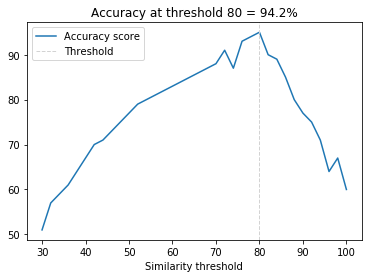

In [38]:
opt_tau = 80
opt_acc = 94.2
f1_scores = [51, 57, 59, 61, 64, 67, 70, 71, 73, 75, 77,79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 91, 87, 93, 94, 95, 90, 89, 85, 80, 77,75, 71, 64, 67, 60]
# print(len(f1_scores))
thresholds = list(range(30, 102, 2))

print((thresholds))
# thresholds = [0.3, 0.31, 0.32, 0.320.35, 0.40, 0.5, 0.55, 0.60, 0.65, 0.7, 0.75, 0.8, 0.85, 0.90]
plt.plot(thresholds, f1_scores, label='Accuracy score');
# plt.plot(thresholds, acc_scores, label='Accuracy');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title(f'Accuracy at threshold {opt_tau:} = {opt_acc:}%');
plt.xlabel('Similarity threshold')
plt.legend();
plt.savefig('accuracyVsdistance.png')